In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as m
import xgboost as xgb
import seaborn as sns

warnings.filterwarnings("ignore")
random_seed = 8

In [2]:
# collected form each main diabetic indicator features regressors
cols = np.unique(
    [
        "AGE","FIELD_31","FIELD_33","FIELD_38","FIELD_40","L100500","L100700","L100800","L101200","L101300",
        "L101600","L101700","L103000","L103100","L103300","L104600","L107400","L190000","L190300","L190400",
        "S000100","S000300","S000501","S000502","SEX","FIELD_1","FIELD_2","FIELD_16","FIELD_23","FIELD_15",
        "FIELD_22","FIELD_17","FIELD_24",'CLASS'
    ]
)

In [3]:
xcols=[]
ycols=[]
allxycols=[]

for i in cols:
    xcols.append (i+'_x')
    ycols.append (i+'_y')
    
    allxycols.append (i+'_x')
    allxycols.append (i+'_y')

Read Dataset
====

In [4]:
x_original = pd.read_csv("../../XLable_onlyDiabeticRemoved.txt")

conditions = [
    (x_original.L100800 < 100),
    (x_original.L100800 >= 100) & (x_original.L100800 < 126),
    (x_original.L100800 >= 126),
]
choices = [0, 1, 2]
x_original["CLASS"] = np.select(conditions, choices, default=0)
x_original=x_original #[cols]

In [5]:
y_original = pd.read_csv("../../TargetLable_onlyDiabeticRemoved.txt")

conditions = [
    (y_original.L100800 < 100),
    (y_original.L100800 >= 100) & (y_original.L100800 < 126),
    (y_original.L100800 >= 126),
]

choices = [0, 1, 2]
y_original["CLASS"] = np.select(conditions, choices, default=0)

y_original=y_original #[cols]

In [6]:
data = pd.merge(
    x_original, y_original, how="inner", left_on="Unnamed: 0", right_on="Unnamed: 0"
)

Prepare dataset
===

In [7]:
# filter the data set
data = data[data.FIELD_16_x != 1]  # exclude people who are diagnosed for (diabetes)
data = data[data.FIELD_23_x != 1]  # exclude people who are on medication for diabetes

data = data[
    data.FIELD_15_x != 1
]  # exclude people who are diagnosed for (high blood pressure)
data = data[
    data.FIELD_22_x != 1
]  # exclude people who are on medication for high blood pressure

data = data[data.FIELD_17_x != 1]  # exclude people who are diagnosed for hyperlipidemia
data = data[
    data.FIELD_24_x != 1
]  # exclude people who are on medication for hyperlipidemia

data = data[allxycols].dropna()
print(data.shape)

(41525, 68)


In [9]:
x = data[xcols]
y = data[ycols]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.2)

Train Regression Models
==========

L104600_y # HBA1C
====

In [10]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=300, max_features=4
)

regr.fit(
    xtrain[
        [
            "L104600_x","L100800_x","S000300_x","AGE_x","L101300_x","S000501_x","L101700_x","S000502_x",
            "L190000_x","L101600_x","L190300_x",
        ]
    ],
    ytrain[["L104600_y"]],
)

ypred = regr.predict(
    xtest[
        [
           "L104600_x","L100800_x","S000300_x","AGE_x","L101300_x","S000501_x","L101700_x","S000502_x",
            "L190000_x","L101600_x","L190300_x",
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["L104600_y"]], ypred))

r2_score 0.629478063806677


In [11]:
pred_L104600 = ypred
pred_L104600.shape

(8305,)

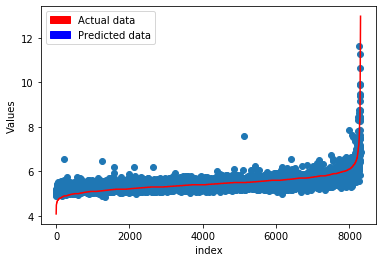

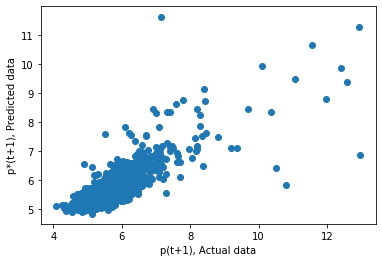

In [12]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L104600_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L103000 #Triglyceride
=====

In [13]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=300, max_features=8
)
regr.fit(
    xtrain[
        [
            "L103000_x",
            "L100700_x",
            "L101700_x",
            "S000300_x",
            "S000502_x",
            "FIELD_33_x",
            "L190000_x",
            "L100800_x",
            "L101600_x",
            "S000501_x",
        ]
    ],
    ytrain[["L103000_y"]],
)

ypred = regr.predict(
    xtest[
        [
            "L103000_x",
            "L100700_x",
            "L101700_x",
            "S000300_x",
            "S000502_x",
            "FIELD_33_x",
            "L190000_x",
            "L100800_x",
            "L101600_x",
            "S000501_x",
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["L103000_y"]], ypred))

r2_score 0.510529744921204


In [14]:
pred_L103000 = ypred

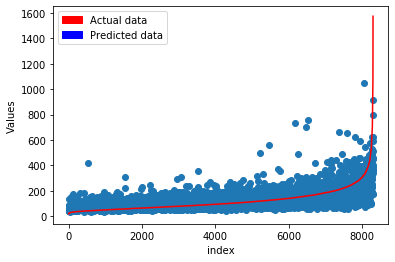

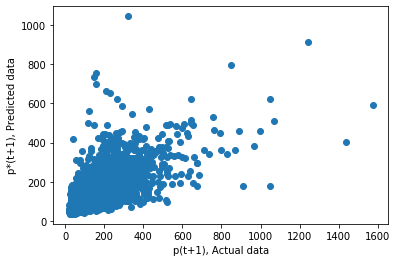

In [15]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L103000_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

S000300 #BMI
===

In [16]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=300, max_features=8
)
regr.fit(
    xtrain[
        [
            "S000300_x",
            "L103300_x",
            "S000501_x",
            "L100700_x",
            "SEX_x",
            "L103100_x",
            "L190300_x",
            "L190400_x",
            "L101300_x",
            "S000502_x",
        ]
    ],
    ytrain[["S000300_y"]],
)

ypred = regr.predict(
    xtest[
        [
            "S000300_x",
            "L103300_x",
            "S000501_x",
            "L100700_x",
            "SEX_x",
            "L103100_x",
            "L190300_x",
            "L190400_x",
            "L101300_x",
            "S000502_x",
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["S000300_y"]], ypred))

r2_score 0.9153489902503515


In [17]:
pred_S000300 = ypred

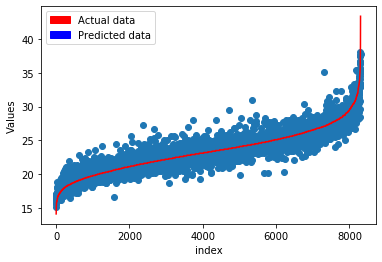

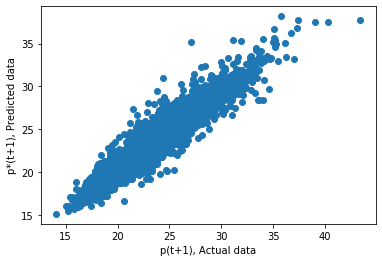

In [18]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["S000300_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L101700 # r-GTP gamma
===

In [19]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=300, max_features=8
)
regr.fit(
    xtrain[
        [
            "L101700_x",
            "L101300_x",
            "L103000_x",
            "SEX_x",
            "L100700_x",
            "L101200_x",
            "S000300_x",
            "S000501_x",
            "L100800_x",
            "S000502_x",
            "L101600_x",
            "S000100_x",
        ]
    ],
    ytrain[["L101700_y"]],
)

ypred = regr.predict(
    xtest[
        [
            "L101700_x",
            "L101300_x",
            "L103000_x",
            "SEX_x",
            "L100700_x",
            "L101200_x",
            "S000300_x",
            "S000501_x",
            "L100800_x",
            "S000502_x",
            "L101600_x",
            "S000100_x",
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["L101700_y"]], ypred))

r2_score 0.6856387627447327


In [20]:
pred_L101700 = ypred

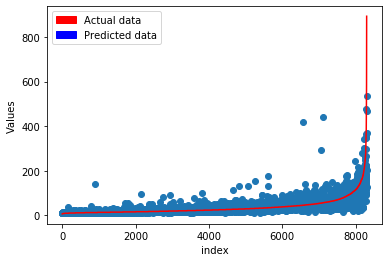

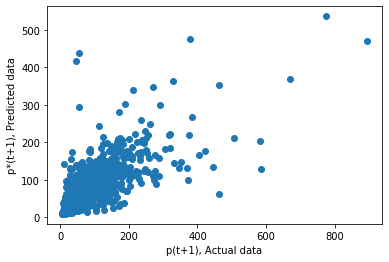

In [21]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L101700_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

L100700 #Uric acid
====

In [22]:
regr = RandomForestRegressor(
    max_depth=10, random_state=random_seed, verbose=0, n_estimators=300, max_features=8
)
regr.fit(
    xtrain[
        [
            "L100700_x",
            "L100500_x",
            "S000100_x",
            "S000300_x",
            "L103300_x",
            "L103000_x",
            "L103100_x",
            "S000501_x",
            "L101300_x",
            "L101700_x",
            "S000502_x",
            "L107400_x",
        ]
    ],
    ytrain[["L100700_y"]],
)

ypred = regr.predict(
    xtest[
        [
            "L100700_x",
            "L100500_x",
            "S000100_x",
            "S000300_x",
            "L103300_x",
            "L103000_x",
            "L103100_x",
            "S000501_x",
            "L101300_x",
            "L101700_x",
            "S000502_x",
            "L107400_x",
        ]
    ]
)

print("r2_score", m.r2_score(ytest[["L100700_y"]], ypred))

r2_score 0.7547680851329417


In [23]:
pred_L100700 = ypred

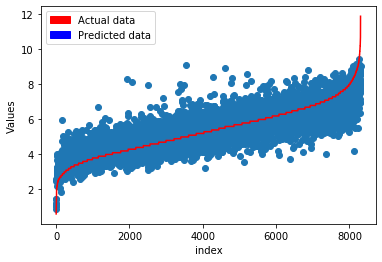

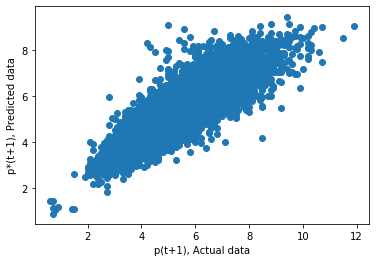

In [24]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

ypredPD=pd.DataFrame() 
ypredPD['t + 1']=ytest[["L100700_y"]].values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

Categorical values
=====

In [25]:
pred_FIELD_33 = ytest.FIELD_33_y

In [26]:
pred_FIELD_38 = ytest.FIELD_38_y

In [27]:
pred_FIELD_40 = ytest.FIELD_40_y

In [28]:
pred_FIELD_31 = ytest.FIELD_31_y

In [29]:
pred_SEX = ytest.SEX_y

In [30]:
pred_AGE = ytest.AGE_y + 1

Combine the predicted values to make dataframe
====

In [31]:
NextYearData = pd.DataFrame()
NextYearData["P_FIELD_1"] = ytest.FIELD_1_y.values
NextYearData["P_FIELD_2"] = ytest.FIELD_2_y.values
NextYearData["P_L104600"] = pred_L104600
NextYearData["P_L103000"] = pred_L103000
NextYearData["P_S000300"] = pred_S000300
NextYearData["P_L101700"] = pred_L101700
NextYearData["P_L100700"] = pred_L100700
NextYearData["P_FIELD_33"] = pred_FIELD_33.values
NextYearData["P_FIELD_38"] = pred_FIELD_38.values
NextYearData["P_FIELD_40"] = pred_FIELD_40.values
NextYearData["P_FIELD_31"] = pred_FIELD_31.values
NextYearData["P_SEX"] = pred_SEX.values
NextYearData["P_AGE"] = pred_AGE.values

NextYearData["P_AGE"] = pred_AGE.values
NextYearData["P_AGE"] = pred_AGE.values


NextYearData["A_L100800"] = ytest.L100800_y.values

conditions = [
    (NextYearData.A_L100800 < 100),
    (NextYearData.A_L100800 >= 100) & (NextYearData.A_L100800 < 126),
    (NextYearData.A_L100800 >= 126),
]
choices = [0, 1, 2]
NextYearData["A_CLASS"] = np.select(conditions, choices, default=0)
NextYearData.head()

,P_FIELD_1,P_FIELD_2,P_L104600,P_L103000,P_S000300,P_L101700,P_L100700,P_FIELD_33,P_FIELD_38,P_FIELD_40,P_FIELD_31,P_SEX,P_AGE,A_L100800,A_CLASS
0,2461167,20150819,5.392827,250.085519,27.273913,19.128248,6.946026,1.0,1.0,3.0,0.0,0.0,39.0,89.0,0
1,557666,20161230,5.348558,133.664245,24.561349,27.003422,6.086963,2.0,2.0,0.0,0.0,0.0,37.0,101.0,1
2,2560579,20150727,5.420073,87.757702,26.235654,30.015240,5.236630,3.0,1.0,0.0,1.0,0.0,44.0,102.0,1
3,792860,20151120,5.347383,82.975345,21.037885,85.583797,3.752156,1.0,1.0,0.0,0.0,1.0,43.0,92.0,0
4,823373,20150314,5.443557,88.102238,28.787142,22.620783,5.842626,3.0,3.0,2.0,0.0,0.0,44.0,91.0,0


In [32]:
NextYearData.to_csv("Predicted_NextYearData.txt", sep=",")

==============================================
==========

In [33]:
# select the actual next year values

NextYearData_actualData = pd.DataFrame()
NextYearData_actualData["FIELD_1"] = ytest.FIELD_1_y.values
NextYearData_actualData["FIELD_2"] = ytest.FIELD_2_y.values
NextYearData_actualData["L104600"] = ytest.L104600_y.values
NextYearData_actualData["L103000"] = ytest.L103000_y.values
NextYearData_actualData["S000300"] = ytest.S000300_y.values
NextYearData_actualData["L101700"] = ytest.L101700_y.values
NextYearData_actualData["L100700"] = ytest.L100700_y.values
NextYearData_actualData["FIELD_33"] = ytest.FIELD_33_y.values
NextYearData_actualData["FIELD_38"] = ytest.FIELD_38_y.values
NextYearData_actualData["FIELD_40"] = ytest.FIELD_40_y.values
NextYearData_actualData["FIELD_31"] = ytest.FIELD_31_y.values
NextYearData_actualData["SEX"] = ytest.SEX_y.values
NextYearData_actualData["AGE"] = ytest.AGE_y.values

NextYearData_actualData["L100800"] = ytest.L100800_y.values

conditions = [
    (NextYearData_actualData.L100800 < 100),
    (NextYearData_actualData.L100800 >= 100) & (NextYearData_actualData.L100800 < 126),
    (NextYearData_actualData.L100800 >= 126),
]
choices = [0, 1, 2]
NextYearData_actualData["CLASS"] = np.select(conditions, choices, default=0)
NextYearData_actualData.head()

NextYearData_actualData.to_csv("NextYearData_actualData_test.txt", sep=",")

==========================================================
===

In [34]:
# select the actual this year values

ThisYearData_actualData = pd.DataFrame()
ThisYearData_actualData["FIELD_1"] = xtest.FIELD_1_x.values
ThisYearData_actualData["FIELD_2"] = xtest.FIELD_2_x.values
ThisYearData_actualData["L104600"] = xtest.L104600_x.values
ThisYearData_actualData["L103000"] = xtest.L103000_x.values
ThisYearData_actualData["S000300"] = xtest.S000300_x.values
ThisYearData_actualData["L101700"] = xtest.L101700_x.values
ThisYearData_actualData["L100700"] = xtest.L100700_x.values
ThisYearData_actualData["FIELD_33"] = xtest.FIELD_33_x.values
ThisYearData_actualData["FIELD_38"] = xtest.FIELD_38_x.values
ThisYearData_actualData["FIELD_40"] = xtest.FIELD_40_x.values
ThisYearData_actualData["FIELD_31"] = xtest.FIELD_31_x.values
ThisYearData_actualData["SEX"] = xtest.SEX_x.values
ThisYearData_actualData["AGE"] = xtest.AGE_x.values
ThisYearData_actualData["L100800"] = xtest.L100800_x.values

conditions = [
    (ThisYearData_actualData.L100800 < 100),
    (ThisYearData_actualData.L100800 >= 100) & (ThisYearData_actualData.L100800 < 126),
    (ThisYearData_actualData.L100800 >= 126),
]
choices = [0, 1, 2]
ThisYearData_actualData["CLASS"] = np.select(conditions, choices, default=0)
ThisYearData_actualData.head()

ThisYearData_actualData.to_csv("ThisYearData_actualData_test.txt", sep=",")

============================================
=========

In [35]:
# select the actual next year values train

NextYearData_actualData_train = pd.DataFrame()
NextYearData_actualData_train["FIELD_1"] = ytrain.FIELD_1_y.values
NextYearData_actualData_train["FIELD_2"] = ytrain.FIELD_2_y.values
NextYearData_actualData_train["L104600"] = ytrain.L104600_y.values
NextYearData_actualData_train["L103000"] = ytrain.L103000_y.values
NextYearData_actualData_train["S000300"] = ytrain.S000300_y.values
NextYearData_actualData_train["L101700"] = ytrain.L101700_y.values
NextYearData_actualData_train["L100700"] = ytrain.L100700_y.values
NextYearData_actualData_train["FIELD_33"] = ytrain.FIELD_33_y.values
NextYearData_actualData_train["FIELD_38"] = ytrain.FIELD_38_y.values
NextYearData_actualData_train["FIELD_40"] = ytrain.FIELD_40_y.values
NextYearData_actualData_train["FIELD_31"] = ytrain.FIELD_31_y.values
NextYearData_actualData_train["SEX"] = ytrain.SEX_y.values
NextYearData_actualData_train["AGE"] = ytrain.AGE_y.values

NextYearData_actualData_train["L100800"] = ytrain.L100800_y.values

conditions = [
    (NextYearData_actualData_train.L100800 < 100),
    (NextYearData_actualData_train.L100800 >= 100)
    & (NextYearData_actualData_train.L100800 < 126),
    (NextYearData_actualData_train.L100800 >= 126),
]
choices = [0, 1, 2]
NextYearData_actualData_train["CLASS"] = np.select(conditions, choices, default=0)
NextYearData_actualData_train.head()

NextYearData_actualData_train.to_csv("NextYearData_actualData_train.txt", sep=",")

=================================================
==============

In [36]:
# select the actual this year values train

ThisYearData_actualData_train = pd.DataFrame()
ThisYearData_actualData_train["FIELD_1"] = xtrain.FIELD_1_x.values
ThisYearData_actualData_train["FIELD_2"] = xtrain.FIELD_2_x.values
ThisYearData_actualData_train["L104600"] = xtrain.L104600_x.values
ThisYearData_actualData_train["L103000"] = xtrain.L103000_x.values
ThisYearData_actualData_train["S000300"] = xtrain.S000300_x.values
ThisYearData_actualData_train["L101700"] = xtrain.L101700_x.values
ThisYearData_actualData_train["L100700"] = xtrain.L100700_x.values
ThisYearData_actualData_train["FIELD_33"] = xtrain.FIELD_33_x.values
ThisYearData_actualData_train["FIELD_38"] = xtrain.FIELD_38_x.values
ThisYearData_actualData_train["FIELD_40"] = xtrain.FIELD_40_x.values
ThisYearData_actualData_train["FIELD_31"] = xtrain.FIELD_31_x.values
ThisYearData_actualData_train["SEX"] = xtrain.SEX_x.values
ThisYearData_actualData_train["AGE"] = xtrain.AGE_x.values
ThisYearData_actualData_train["L100800"] = xtrain.L100800_x.values

conditions = [
    (ThisYearData_actualData_train.L100800 < 100),
    (ThisYearData_actualData_train.L100800 >= 100)
    & (ThisYearData_actualData_train.L100800 < 126),
    (ThisYearData_actualData_train.L100800 >= 126),
]
choices = [0, 1, 2]
ThisYearData_actualData_train["CLASS"] = np.select(conditions, choices, default=0)
ThisYearData_actualData_train.head()

ThisYearData_actualData_train.to_csv("ThisYearData_actualData_train.txt", sep=",")